<a href="https://colab.research.google.com/github/afnanhabib787/Artificial-Intelligence/blob/main/Cat_Dog_with_CNN_Data_augmentation_Pretrained_convnet_feature_extracting_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle\

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"afnanhabib787","key":"30b2e622f6c5384f87a3c6ea1e6a3cab"}'}

In [7]:
#Make a directory named kaggle and copy the kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d biaiscience/dogs-vs-cats

 99% 811M/817M [00:07<00:00, 140MB/s]
100% 817M/817M [00:07<00:00, 113MB/s]


In [9]:
from zipfile import ZipFile
file_name = 'dogs-vs-cats.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [10]:
import os, shutil

In [11]:
original_dataset_dir = '/content/train/train'


In [12]:
base_dir = '/content/cats_and_dogs_small'
os.mkdir(base_dir)

In [13]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

In [14]:
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [15]:
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [16]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

In [17]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [18]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

In [19]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [20]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

In [21]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [22]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  shutil.copyfile(src, dst)

In [23]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir,fname)
  shutil.copyfile(src, dst)

In [24]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir,fname)
  shutil.copyfile(src, dst)

In [25]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir,fname)
  shutil.copyfile(src, dst)

In [26]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir,fname)
  shutil.copyfile(src, dst)

In [27]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir,fname)
  shutil.copyfile(src, dst)

In [28]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [29]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [30]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [31]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [32]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

In [34]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=[['acc']])

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [36]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 44s 114ms/step - loss: 0.6929 - acc: 0.5345 - val_loss: 0.6757 - val_acc: 0.6050
Epoch 2/30
100/100 [==============================] - 11s 114ms/step - loss: 0.6570 - acc: 0.6080 - val_loss: 0.6487 - val_acc: 0.6200
Epoch 3/30
100/100 [==============================] - 11s 113ms/step - loss: 0.6213 - acc: 0.6615 - val_loss: 0.7000 - val_acc: 0.5610
Epoch 4/30
100/100 [==============================] - 11s 114ms/step - loss: 0.5839 - acc: 0.6910 - val_loss: 0.6281 - val_acc: 0.6330
Epoch 5/30
100/100 [==============================] - 12s 115ms/step - loss: 0.5401 - acc: 0.7290 - val_loss: 0.5807 - val_acc: 0.6900
Epoch 6/30
100/100 [==============================] - 11s 114ms/step - loss: 0.5106 - acc: 0.7460 - val_loss: 0.6038 - val_acc: 0.6710
Epoch 7/30
100/100 [==============================] - 11s 114ms/step - loss: 0.4816 - acc: 0.7550 - val_loss: 0.5695 - val_acc: 0.6870
Epoch 8/30
100/100 [==============================] - 1

In [37]:
model.save('cats_and_dogs_small_1.h5')

[0.6140000224113464]

ValueError: ignored

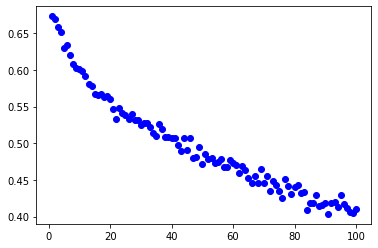

In [54]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validataion accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [40]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [41]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
          fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

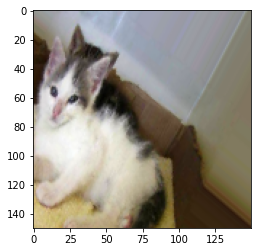

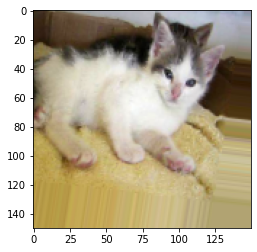

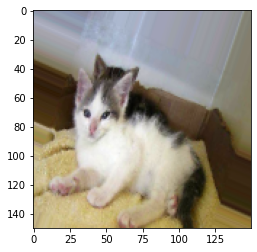

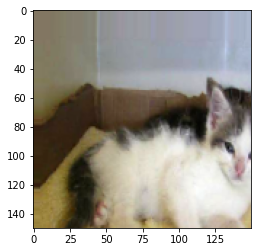

In [43]:
x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i +=1
  if i % 4 == 0:
    break
plt.show()

In [46]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [60]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_dir),
    epochs=100,
    validation_data=validation_generator,
    validation_steps=len(test_dir))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
34/34 [==============================] - 15s 431ms/step - loss: 0.3898 - acc: 0.8293 - val_loss: 0.4788 - val_acc: 0.7700
Epoch 2/100
34/34 [==============================] - 9s 269ms/step - loss: 0.3863 - acc: 0.8340
Epoch 3/100
34/34 [==============================] - 9s 274ms/step - loss: 0.4050 - acc: 0.8107
Epoch 4/100
34/34 [==============================] - 9s 266ms/step - loss: 0.4054 - acc: 0.8144
Epoch 5/100
34/34 [==============================] - 9s 268ms/step - loss: 0.4002 - acc: 0.8144
Epoch 6/100
34/34 [==============================] - 9s 266ms/step - loss: 0.3864 - acc: 0.8190
Epoch 7/100
34/34 [==============================] - 9s 266ms/step - loss: 0.4007 - acc: 0.8172
Epoch 8/100
34/34 [==============================] - 9s 267ms/step - loss: 0.4192 - acc: 0.8172
Epoch 9/100
34/34 [==============================] - 9s 267ms/step - loss: 0.3831 - acc: 0.8290
Epoch 10/100
34/34 [==============================] - 9s 264ms/step - loss: 0.4135 - acc: 0.8144
E

In [61]:
model.save('cats_and_dogs_small_2.h5')

In [62]:
history.history['val_acc']

[0.7699999809265137]

ValueError: ignored

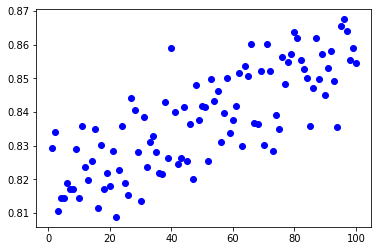

In [63]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validataion accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [1]:
from tensorflow.keras.applications import VGG16

In [4]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

In [5]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [34]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size=20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count,4,4,512))
  labels = np.zeros(shape=(sample_count))
  generator= datagen.flow_from_directory(
      directory,
      target_size=(150,150),
      batch_size=batch_size,
      class_mode='binary'
  )
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i*batch_size:(i+1)*batch_size] = features_batch
    labels[i*batch_size:(i+1)*batch_size] = labels_batch
    i += 1
    if i*batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [36]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000,4*4*512))
test_features = np.reshape(test_features, (1000,4*4*512))

In [40]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features,validation_labels))

Epoch 1/30
100/100 [==============================] - 2s 8ms/step - loss: 0.5819 - acc: 0.6935 - val_loss: 0.4435 - val_acc: 0.8300
Epoch 2/30
100/100 [==============================] - 1s 6ms/step - loss: 0.4275 - acc: 0.8130 - val_loss: 0.3763 - val_acc: 0.8350
Epoch 3/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3574 - acc: 0.8530 - val_loss: 0.3281 - val_acc: 0.8720
Epoch 4/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3191 - acc: 0.8685 - val_loss: 0.3045 - val_acc: 0.8770
Epoch 5/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2941 - acc: 0.8755 - val_loss: 0.3082 - val_acc: 0.8690
Epoch 6/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2643 - acc: 0.8910 - val_loss: 0.2778 - val_acc: 0.8900
Epoch 7/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2469 - acc: 0.9010 - val_loss: 0.2698 - val_acc: 0.8940
Epoch 8/30
100/100 [==============================] - 1s 6ms/step - loss: 0.

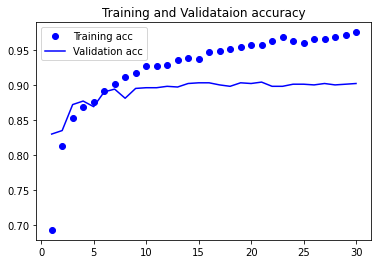

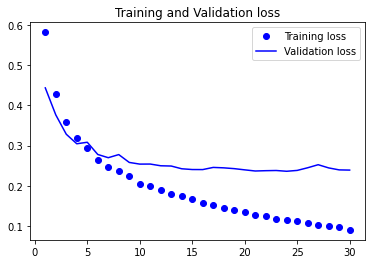

In [41]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validataion accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()